In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector
import os
import subprocess
import gc
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import quad
from scipy.interpolate import interp1d
print("uproot version", uproot.__version__)
print("awkward version", ak.__version__)
print("numpy version", np.__version__)
print("matplotlib version", matplotlib.__version__)
print("hist version", hist.__version__)
print("vector version", vector.__version__)
#print("os version", os.__version__)
#print("subprocess version", subprocess.__version__)
#print("gc version", gc.__version__)
print("pandas version", pd.__version__)
#print("scipy.optimize version", scipy.optimize.__version__)
#print("scipy.integrate version", scipy.integrate.__version__)

uproot version 5.0.12
awkward version 2.4.3
numpy version 1.25.2
matplotlib version 3.8.0
hist version 2.7.2
vector version 1.1.1
pandas version 1.5.3


In [2]:
X = [1.5099999999999998, 1.53, 1.55, 1.57, 1.59, 1.6099999999999999, 1.6300000000000001, 1.65, 1.67, 1.69, 1.71, 1.73, 1.75, 1.77, 1.79, 1.81, 1.83, 1.85, 1.87, 1.89, 1.9100000000000001, 1.93, 1.95, 1.97, 1.9900000000000002, 2.0100000000000002, 2.03, 2.05, 2.0700000000000003, 2.09, 2.1100000000000003, 2.13, 2.1500000000000004, 2.17, 2.19, 2.21, 2.23, 2.25, 2.27, 2.29, 2.3099999999999996, 2.33, 2.3499999999999996, 2.37, 2.39, 2.41, 2.43, 2.45, 2.4699999999999998, 2.49, 2.5100000000000002, 2.5300000000000002, 2.55, 2.57, 2.59, 2.61, 2.63, 2.65, 2.67, 2.69, 2.71, 2.73, 2.75, 2.7700000000000005, 2.79, 2.81, 2.83, 2.85, 2.87, 2.89, 2.91, 2.9299999999999997, 2.95, 2.97, 2.99, 3.01, 3.0300000000000002, 3.0500000000000003, 3.07, 3.09, 3.1100000000000003, 3.13, 3.1500000000000004, 3.17, 3.1900000000000004, 3.21, 3.2300000000000004, 3.25, 3.27, 3.29, 3.3099999999999996, 3.3300000000000005, 3.3499999999999996, 3.37, 3.39, 3.41, 3.43, 3.4499999999999997, 3.4699999999999998, 3.49, 3.51, 3.5300000000000002, 3.5500000000000003, 3.5700000000000003, 3.59, 3.61, 3.63, 3.6500000000000004, 3.67, 3.6899999999999995, 3.7100000000000004, 3.7299999999999995, 3.75, 3.77, 3.79, 3.8100000000000005, 3.8299999999999996, 3.8499999999999996, 3.87, 3.8899999999999997, 3.91, 3.93, 3.95, 3.9699999999999998, 3.9899999999999998, 4.01, 4.03, 4.05, 4.07, 4.09, 4.109999999999999, 4.13, 4.15, 4.17, 4.19, 4.21, 4.23, 4.25, 4.2700000000000005, 4.29, 4.31, 4.33, 4.35, 4.37, 4.390000000000001, 4.409999999999999, 4.43, 4.45, 4.47, 4.49, 4.51, 4.53, 4.550000000000001, 4.569999999999999, 4.59, 4.61, 4.63, 4.65, 4.67, 4.6899999999999995, 4.71, 4.7299999999999995, 4.75, 4.7700000000000005, 4.789999999999999, 4.8100000000000005, 4.83, 4.85, 4.87, 4.89, 4.91, 4.930000000000001, 4.95, 4.97, 4.99]

start = X[0] - (X[2] - X[1])/2
stop = X[-1] + (X[2] - X[1])/2
bins = len(X)

In [3]:
# eventsCuts: isCMUL == True
# tracksCuts: -4.0 < eta < -2.5; pT > 0.5; 2° < thetaAbs < 10°
# pairsCuts: -4.0 < rapidity < -2.5

Y_OS = [33113.0, 32370.0, 32323.0, 31651.0, 30474.0, 30246.0, 29830.0, 29291.0, 28477.0, 27672.0, 27162.0, 26906.0, 26174.0, 25432.0, 25316.0, 24111.0, 23836.0, 23451.0, 22843.0, 22493.0, 21807.0, 21102.0, 20961.0, 20231.0, 19606.0, 19333.0, 18636.0, 18115.0, 17557.0, 17079.0, 16775.0, 16472.0, 16142.0, 15586.0, 15342.0, 14817.0, 14506.0, 14034.0, 13824.0, 13295.0, 12845.0, 12640.0, 12434.0, 12132.0, 11873.0, 11330.0, 11245.0, 10846.0, 10774.0, 10376.0, 10334.0, 9969.0, 9728.0, 9316.0, 9264.0, 8988.0, 8895.0, 8793.0, 8507.0, 8291.0, 8177.0, 8208.0, 7980.0, 7864.0, 7986.0, 7828.0, 8063.0, 8145.0, 8231.0, 8784.0, 9589.0, 10255.0, 11222.0, 12721.0, 14574.0, 17677.0, 20353.0, 23687.0, 26303.0, 27961.0, 27860.0, 25856.0, 22329.0, 17891.0, 13746.0, 10241.0, 7762.0, 6358.0, 5095.0, 4505.0, 4008.0, 3877.0, 3512.0, 3365.0, 3212.0, 3232.0, 3005.0, 2926.0, 2942.0, 2835.0, 2737.0, 2811.0, 2671.0, 2631.0, 2771.0, 2665.0, 2641.0, 2782.0, 2694.0, 2566.0, 2614.0, 2417.0, 2375.0, 2315.0, 2154.0, 1939.0, 1916.0, 1828.0, 1762.0, 1721.0, 1793.0, 1623.0, 1664.0, 1622.0, 1545.0, 1521.0, 1493.0, 1507.0, 1484.0, 1424.0, 1400.0, 1389.0, 1358.0, 1390.0, 1298.0, 1265.0, 1260.0, 1211.0, 1218.0, 1170.0, 1143.0, 1172.0, 1127.0, 1062.0, 1100.0, 1061.0, 1018.0, 1015.0, 1054.0, 968.0, 963.0, 891.0, 961.0, 893.0, 854.0, 844.0, 876.0, 887.0, 797.0, 855.0, 806.0, 809.0, 764.0, 772.0, 774.0, 759.0, 719.0, 747.0, 760.0, 670.0, 710.0, 681.0, 681.0, 650.0, 644.0]

vMass_OS = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_OS.fill(X, weight = Y_OS)

Y_LS = [6253.0, 6216.0, 6032.0, 5879.0, 5798.0, 5819.0, 5672.0, 5645.0, 5427.0, 5299.0, 5167.0, 5203.0, 5038.0, 4943.0, 4741.0, 4559.0, 4531.0, 4488.0, 4447.0, 4255.0, 4206.0, 4029.0, 4047.0, 3851.0, 3776.0, 3759.0, 3590.0, 3593.0, 3426.0, 3417.0, 3442.0, 3262.0, 3213.0, 3118.0, 3094.0, 2955.0, 2999.0, 2947.0, 2854.0, 2743.0, 2742.0, 2684.0, 2601.0, 2454.0, 2509.0, 2468.0, 2393.0, 2316.0, 2281.0, 2382.0, 2258.0, 2180.0, 2163.0, 2077.0, 1977.0, 2043.0, 1906.0, 1947.0, 1974.0, 1969.0, 1868.0, 1893.0, 1804.0, 1740.0, 1705.0, 1648.0, 1613.0, 1628.0, 1608.0, 1553.0, 1563.0, 1490.0, 1523.0, 1444.0, 1387.0, 1429.0, 1322.0, 1392.0, 1401.0, 1289.0, 1275.0, 1226.0, 1245.0, 1234.0, 1160.0, 1171.0, 1147.0, 1131.0, 1059.0, 1130.0, 1115.0, 1056.0, 1077.0, 1009.0, 1030.0, 984.0, 1010.0, 971.0, 924.0, 938.0, 871.0, 889.0, 867.0, 849.0, 821.0, 839.0, 858.0, 795.0, 769.0, 749.0, 780.0, 789.0, 752.0, 712.0, 641.0, 703.0, 702.0, 682.0, 691.0, 690.0, 690.0, 641.0, 616.0, 642.0, 586.0, 575.0, 606.0, 626.0, 547.0, 559.0, 593.0, 545.0, 562.0, 530.0, 522.0, 478.0, 456.0, 478.0, 498.0, 494.0, 478.0, 438.0, 432.0, 473.0, 458.0, 436.0, 425.0, 440.0, 424.0, 417.0, 407.0, 371.0, 409.0, 436.0, 406.0, 407.0, 394.0, 365.0, 401.0, 351.0, 378.0, 330.0, 347.0, 360.0, 331.0, 334.0, 324.0, 343.0, 320.0, 315.0, 329.0, 318.0, 311.0, 276.0, 294.0]

vMass_LS = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_LS.fill(X, weight = Y_LS)

Y_JPsi = [54.0, 46.0, 56.0, 49.0, 69.0, 70.0, 60.0, 83.0, 81.0, 94.0, 95.0, 68.0, 104.0, 111.0, 129.0, 111.0, 124.0, 143.0, 136.0, 142.0, 140.0, 138.0, 171.0, 180.0, 199.0, 222.0, 237.0, 232.0, 224.0, 277.0, 294.0, 299.0, 315.0, 323.0, 354.0, 342.0, 395.0, 383.0, 432.0, 472.0, 438.0, 492.0, 519.0, 521.0, 550.0, 613.0, 645.0, 706.0, 810.0, 856.0, 875.0, 891.0, 998.0, 1050.0, 1107.0, 1254.0, 1428.0, 1537.0, 1669.0, 1884.0, 2154.0, 2373.0, 2739.0, 3207.0, 3631.0, 4172.0, 4972.0, 5943.0, 6844.0, 8363.0, 10122.0, 12273.0, 15620.0, 19709.0, 25529.0, 33048.0, 43200.0, 54933.0, 66755.0, 75584.0, 78042.0, 72291.0, 58946.0, 42808.0, 27334.0, 16032.0, 8958.0, 4882.0, 2664.0, 1611.0, 1052.0, 793.0, 581.0, 443.0, 321.0, 254.0, 190.0, 179.0, 154.0, 134.0, 103.0, 104.0, 85.0, 62.0, 68.0, 56.0, 50.0, 43.0, 45.0, 46.0, 32.0, 29.0, 31.0, 35.0, 32.0, 28.0, 19.0, 14.0, 14.0, 20.0, 12.0, 14.0, 20.0, 17.0, 8.0, 13.0, 17.0, 7.0, 10.0, 7.0, 4.0, 7.0, 6.0, 8.0, 4.0, 6.0, 7.0, 7.0, 6.0, 6.0, 6.0, 4.0, 4.0, 2.0, 4.0, 3.0, 2.0, 4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 2.0, 3.0, 1.0, 2.0, 3.0, 4.0, 1.0, 3.0, 5.0, 1.0, 3.0, 2.0, 2.0, 0.0, 1.0, 0.0, 3.0, 4.0, 0.0, 2.0, 0.0]

vMass_JPsi = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_JPsi.fill(X, weight = Y_JPsi)

Y_Psi = [21.0, 7.0, 14.0, 23.0, 18.0, 14.0, 15.0, 18.0, 11.0, 21.0, 18.0, 10.0, 29.0, 22.0, 20.0, 28.0, 26.0, 29.0, 26.0, 31.0, 42.0, 30.0, 24.0, 32.0, 51.0, 31.0, 58.0, 45.0, 42.0, 64.0, 53.0, 61.0, 61.0, 68.0, 57.0, 61.0, 69.0, 83.0, 68.0, 72.0, 99.0, 72.0, 97.0, 93.0, 97.0, 77.0, 104.0, 126.0, 108.0, 97.0, 154.0, 141.0, 141.0, 147.0, 149.0, 158.0, 175.0, 180.0, 163.0, 197.0, 200.0, 216.0, 220.0, 250.0, 253.0, 225.0, 253.0, 226.0, 303.0, 323.0, 305.0, 353.0, 336.0, 358.0, 376.0, 401.0, 431.0, 443.0, 463.0, 500.0, 528.0, 571.0, 660.0, 702.0, 772.0, 843.0, 945.0, 983.0, 1225.0, 1269.0, 1415.0, 1677.0, 1810.0, 2132.0, 2402.0, 2671.0, 3034.0, 3646.0, 4187.0, 4894.0, 5917.0, 7360.0, 9168.0, 11481.0, 15054.0, 19038.0, 23943.0, 30024.0, 34738.0, 38319.0, 37975.0, 34060.0, 27431.0, 19319.0, 12265.0, 7201.0, 3979.0, 2200.0, 1274.0, 757.0, 531.0, 363.0, 247.0, 211.0, 154.0, 129.0, 103.0, 90.0, 84.0, 48.0, 52.0, 44.0, 44.0, 48.0, 30.0, 19.0, 28.0, 22.0, 20.0, 23.0, 21.0, 16.0, 19.0, 6.0, 10.0, 8.0, 15.0, 11.0, 14.0, 10.0, 9.0, 10.0, 8.0, 4.0, 9.0, 11.0, 10.0, 4.0, 3.0, 4.0, 4.0, 7.0, 5.0, 4.0, 8.0, 3.0, 2.0, 6.0, 5.0, 2.0, 2.0, 3.0, 6.0, 1.0, 2.0]

vMass_Psi = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_Psi.fill(X, weight = Y_Psi)

Y_MC = [75.0, 53.0, 70.0, 72.0, 87.0, 84.0, 75.0, 101.0, 92.0, 115.0, 113.0, 78.0, 133.0, 133.0, 149.0, 139.0, 150.0, 172.0, 162.0, 173.0, 182.0, 168.0, 195.0, 212.0, 250.0, 253.0, 295.0, 277.0, 266.0, 341.0, 347.0, 360.0, 376.0, 391.0, 411.0, 403.0, 464.0, 466.0, 500.0, 544.0, 537.0, 564.0, 616.0, 614.0, 647.0, 690.0, 749.0, 832.0, 918.0, 953.0, 1029.0, 1032.0, 1139.0, 1197.0, 1256.0, 1412.0, 1603.0, 1717.0, 1832.0, 2081.0, 2354.0, 2589.0, 2959.0, 3457.0, 3884.0, 4397.0, 5225.0, 6169.0, 7147.0, 8686.0, 10427.0, 12626.0, 15956.0, 20067.0, 25905.0, 33449.0, 43631.0, 55376.0, 67218.0, 76084.0, 78570.0, 72862.0, 59606.0, 43510.0, 28106.0, 16875.0, 9903.0, 5865.0, 3889.0, 2880.0, 2467.0, 2470.0, 2391.0, 2575.0, 2723.0, 2925.0, 3224.0, 3825.0, 4341.0, 5028.0, 6020.0, 7464.0, 9253.0, 11543.0, 15122.0, 19094.0, 23993.0, 30067.0, 34783.0, 38365.0, 38007.0, 34089.0, 27462.0, 19354.0, 12297.0, 7229.0, 3998.0, 2214.0, 1288.0, 777.0, 543.0, 377.0, 267.0, 228.0, 162.0, 142.0, 120.0, 97.0, 94.0, 55.0, 56.0, 51.0, 50.0, 56.0, 34.0, 25.0, 35.0, 29.0, 26.0, 29.0, 27.0, 20.0, 23.0, 8.0, 14.0, 11.0, 17.0, 15.0, 15.0, 11.0, 12.0, 12.0, 9.0, 5.0, 11.0, 14.0, 11.0, 6.0, 6.0, 8.0, 5.0, 10.0, 10.0, 5.0, 11.0, 5.0, 4.0, 6.0, 6.0, 2.0, 5.0, 7.0, 6.0, 3.0, 2.0]

vMass_MC = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_MC.fill(X, weight = Y_MC)

Hist(Regular(175, 1.5, 5, name='$m_{\\mu \\mu}$', label='X'), storage=Double()) # Sum: 1137223.0

In [4]:
def CB2(x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )

    return np.piecewise(x, 
                        [( x - mu )/sig < -1 * alphaL, (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , ( x - mu )/sig > alphaR],
                        [lambda x: N * AL * (BL - (( x - mu )/sig))**(-nL), lambda x: N * np.exp(-1 * (( x - mu )/sig)**2 / 2), lambda x: N * AR * (BR + ( x - mu )/sig)**(-nR)])

def NA60(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
    return np.piecewise(x, 
                        [(x - mu)/sig < alphaL, 
                         ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                         (x - mu)/sig > alphaR],
                        [lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1L * (alphaL - (x - mu)/sig)**(p2L - p3L * np.sqrt(alphaL - (x - mu)/sig)))**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1R * ((x - mu)/sig - alphaR)**(p2R - p3R * np.sqrt((x - mu)/sig - alphaR)))**2)])

def VWG(x, N, mu, alpha, beta):
    sigma = alpha + beta*((x-mu)/mu)
    return N * np.exp(-(x - mu)**2 / (2*sigma**2))

def PR(x, N, a1, b1, b2):
    return N * (1 + a1*x) / (b1*x + b2*x)

def DE(x, N, alpha, beta1, beta2):
    return N * (np.exp(beta1*x) + alpha * np.exp(beta2*x))

def test(x, y1, y2, y3, y4, y5):
    x0 = [1.5, 2.5, 3.45, 3.8, 5]
    return interp1d([*x0], [y1, y2, y3, y4, y5], kind = 'cubic', bounds_error = False, fill_value = "extrapolate")(x)

def test2(x, y1, y2, y3, y4, y5):
    return np.exp(test(x, y1, y2, y3, y4, y5))

In [5]:
def fixedFunc_JPsi(x, N1, mu1, sig1):
    return func_JPsi(x, N1, mu1, sig1, alphaL1, nL1, alphaR1, nR1)

def fixedFunc_Psi(x, N2, mu2, sig2):
    return func_Psi(x, N2, mu2, sig2, alphaL2, nL2, alphaR2, nR2)

def fixedFunc_MC(x, N1, mu1, sig1, N2, mu2, sig2):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2)

def fixedFunc_bckg(x, y1, y2, y3, y4, y5):
    return func_bckg(x, y1, y2, y3, y4, y5)

def fixedFitFunc(x,
                 N1, mu1, sig1,
                 N2, mu2, sig2,
                y1, y2, y3, y4, y5):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2) + fixedFunc_bckg(x, y1, y2, y3, y4, y5)

condition_x_range = lambda x_data: (x_data < 5.0)
func_JPsi = CB2
func_Psi = CB2
func_bckg = test2
func_MC = fixedFunc_MC
func = fixedFitFunc

In [6]:
x_data = np.array(X)
y_data = np.array(vMass_JPsi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

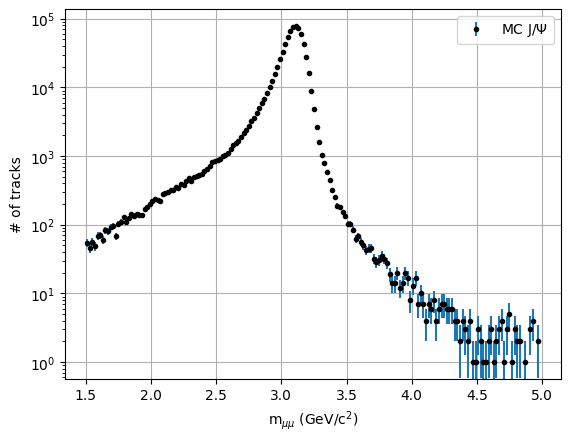

In [7]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [8]:
p0_JPsi = np.array([136241.85680339273, 3.1003675365856544, 0.0630318569252801, 0.993869592186634, 3.0340276033125493, 2.233482641523906, 2.705629560440874])

In [9]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_JPsi, pcov_JPsi, nfev_JPsi, fvec_JPsi, fjac_JPsi = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_JPsi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_JPsi))
print("pcov: \n", pcov_JPsi)
print("residual: \n", nfev_JPsi)

popt: 
 [78548.45211821242, 3.1006057947893644, 0.062307537053070704, 0.9876700478114371, 3.0339424989692683, 2.22500673139067, 2.711039130437428]
pcov: 
 [[ 1.29048288e+05  3.08313554e-02 -6.91772746e-02 -3.80763750e-01
  -1.81834646e-01 -1.95749444e+00  4.08575411e+00]
 [ 3.08313554e-02  1.16656032e-07 -6.36496893e-08 -2.19429522e-06
   6.26996769e-06 -9.73159709e-07  7.40659935e-07]
 [-6.91772746e-02 -6.36496893e-08  9.67468375e-08  1.96652042e-06
  -4.19909841e-06  3.53679127e-06 -6.72907508e-06]
 [-3.80763750e-01 -2.19429522e-06  1.96652042e-06  1.10468486e-04
  -4.27380796e-04  6.48510304e-05 -1.08421842e-04]
 [-1.81834646e-01  6.26996769e-06 -4.19909841e-06 -4.27380796e-04
   2.36620038e-03 -1.17256780e-04  1.66325107e-04]
 [-1.95749444e+00 -9.73159709e-07  3.53679127e-06  6.48510304e-05
  -1.17256780e-04  8.66377095e-04 -2.72059637e-03]
 [ 4.08575411e+00  7.40659935e-07 -6.72907508e-06 -1.08421842e-04
   1.66325107e-04 -2.72059637e-03  1.21587092e-02]]
residual: 
 {'nfev': 7, '

fit error : 359.2329378677158


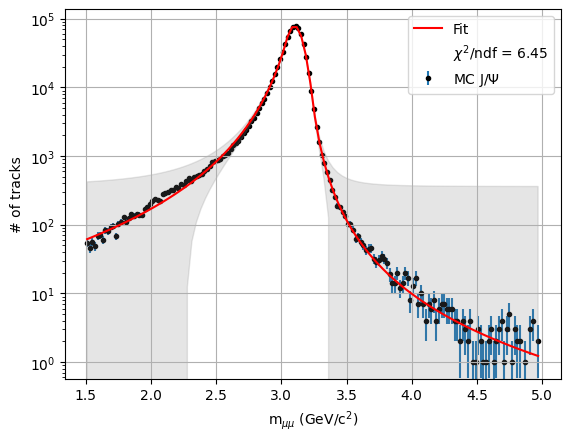

In [10]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_JPsi(x_fit, *popt_JPsi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_JPsi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_JPsi(x_data, *popt_JPsi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_JPsi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

/tmp/ipykernel_12723/2642993752.py:1: RuntimeWarning: divide by zero encountered in divide
  err = np.sqrt(nfev_JPsi["fvec"]**2/(nfev_JPsi["nfev"]-len(popt_JPsi)))


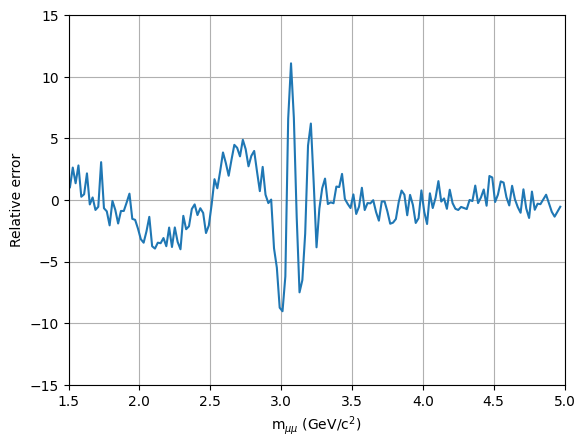

In [11]:
err = np.sqrt(nfev_JPsi["fvec"]**2/(nfev_JPsi["nfev"]-len(popt_JPsi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_JPsi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [12]:
x_data = np.array(X)
y_data = np.array(vMass_Psi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

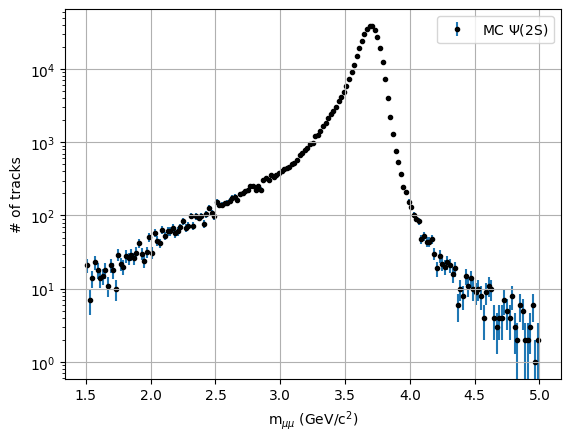

In [13]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [14]:
p0_Psi = np.array([67449.51297432544, 3.693248662583962, 0.06511527893660865, 0.9607870324016564, 2.849198115287005, 2.283717751711943, 2.5497581009488974])

In [15]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_Psi, pcov_Psi, nfev_Psi, fvec_Psi, fjac_Psi = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_Psi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_Psi))
print("pcov: \n", pcov_Psi)
print("residual: \n", nfev_Psi)

popt: 
 [38908.332409378025, 3.6936855424388586, 0.06421033900554339, 0.9492152001251447, 2.870809551035409, 2.259344348990975, 2.629554202548859]
pcov: 
 [[ 4.32968799e+04  2.20383293e-02 -4.79848088e-02 -1.96451197e-01
  -2.24821946e-01 -1.38497114e+00  3.15272381e+00]
 [ 2.20383293e-02  1.73229668e-07 -9.47414126e-08 -2.77756192e-06
   6.57397492e-06 -1.48097513e-06  1.42382353e-06]
 [-4.79848088e-02 -9.47414126e-08  1.40293168e-07  2.45959976e-06
  -4.22440864e-06  5.20179059e-06 -1.07784548e-05]
 [-1.96451197e-01 -2.77756192e-06  2.45959976e-06  1.19929934e-04
  -3.92808321e-04  8.26434397e-05 -1.51791635e-04]
 [-2.24821946e-01  6.57397492e-06 -4.22440864e-06 -3.92808321e-04
   1.91916523e-03 -1.17264423e-04  1.80503214e-04]
 [-1.38497114e+00 -1.48097513e-06  5.20179059e-06  8.26434397e-05
  -1.17264423e-04  1.40517148e-03 -4.68711037e-03]
 [ 3.15272381e+00  1.42382353e-06 -1.07784548e-05 -1.51791635e-04
   1.80503214e-04 -4.68711037e-03  2.11928048e-02]]
residual: 
 {'nfev': 7, '

fit error : 208.07908239374248


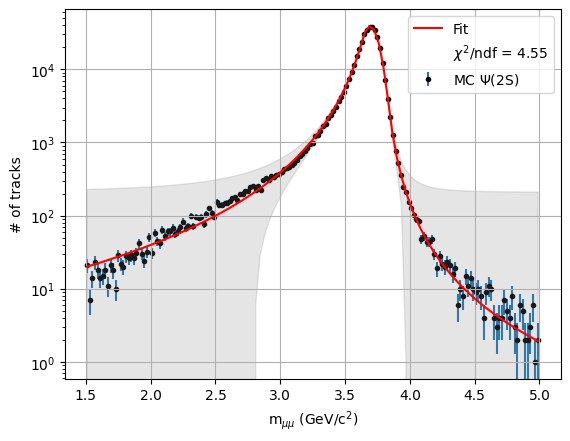

In [16]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_Psi(x_fit, *popt_Psi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_Psi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_Psi(x_data, *popt_Psi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_Psi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

/tmp/ipykernel_12723/3080860769.py:1: RuntimeWarning: divide by zero encountered in divide
  err = np.sqrt(nfev_Psi["fvec"]**2/(nfev_Psi["nfev"]-len(popt_Psi)))


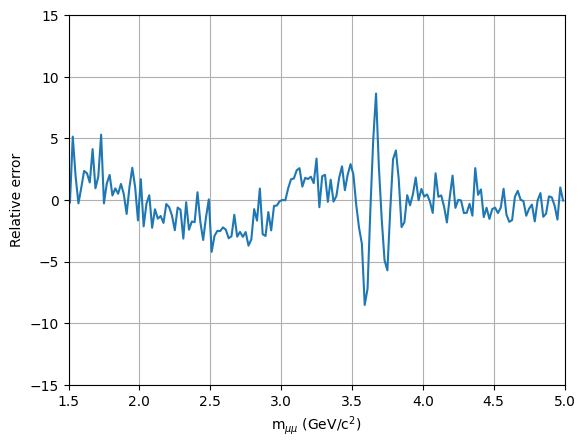

In [17]:
err = np.sqrt(nfev_Psi["fvec"]**2/(nfev_Psi["nfev"]-len(popt_Psi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_Psi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [18]:
x_data = np.array(X)
y_data = np.array(vMass_MC)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

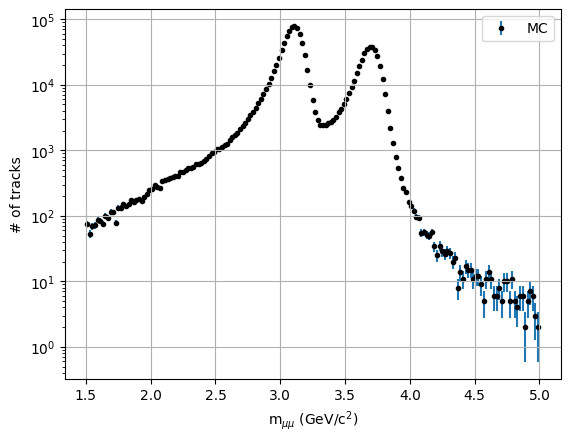

In [19]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [20]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1= popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

p0_MC = np.array([N1, mu1, sig1, N2, mu2, sig2])

In [21]:
def mklb(p0, var):
    return p0*(1-np.sign(p0)*var)

def mkub(p0, var):
    return p0*(1+np.sign(p0)*var)

varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0_MC[:3],varpks), *mklb(p0_MC[3:6],varpks)])
ub = np.array([*mkub(p0_MC[:3],varpks), *mkub(p0_MC[3:6],varpks)])
bounds = (lb,ub)

In [22]:
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, method = 'trf', full_output = True)
popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_MC))
print("pcov: \n", pcov_MC)
print("residual: \n", nfev_MC)

popt: 
 [78484.26637836323, 3.100452944404535, 0.062385529937316934, 38914.200474294565, 3.693677685731009, 0.06422766995897748]
pcov: 
 [[ 1.55890613e+05  2.41261384e-02 -6.79324875e-02 -5.84884167e+02
  -2.33294551e-03  3.07097453e-03]
 [ 2.41261384e-02  8.52482527e-08 -1.90876205e-08  5.48201781e-05
   9.77015742e-10 -7.76212357e-10]
 [-6.79324875e-02 -1.90876205e-08  5.71319964e-08  1.76970480e-03
   5.72449647e-09 -8.14242435e-09]
 [-5.84884167e+02  5.48201781e-05  1.76970480e-03  7.40457318e+04
   2.94631281e-02 -6.89227048e-02]
 [-2.33294551e-03  9.77015742e-10  5.72449647e-09  2.94631281e-02
   1.84223200e-07 -5.63773980e-08]
 [ 3.07097453e-03 -7.76212357e-10 -8.14242435e-09 -6.89227048e-02
  -5.63773980e-08  1.25533327e-07]]
residual: 
 {'nfev': 4, 'fvec': array([ 8.02129764e-01,  4.35244135e+00,  2.09783140e+00,  2.18619246e+00,
        7.17288925e-01,  1.41625063e+00,  2.93626493e+00,  3.03110735e-01,
        1.65175003e+00, -2.95544796e-01,  2.84225261e-01,  4.80407970e+00,

fit error : 479.5167825913774


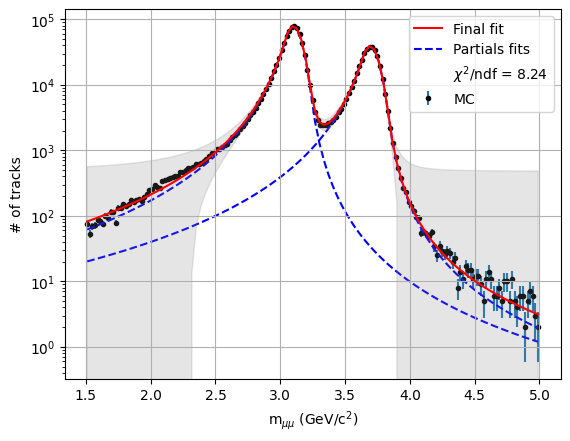

In [23]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_MC(x_fit, *popt_MC)
plt.plot(x_fit, y_fit, '-r', label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt_MC[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt_MC[3:6]), '--b', zorder = 1)

sigmas = np.diag(pcov_MC)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_MC(x_data, *popt_MC)) / y_error) ** 2)
ndf = len(x_data) + len(popt_MC) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

/tmp/ipykernel_12723/4254452161.py:1: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))


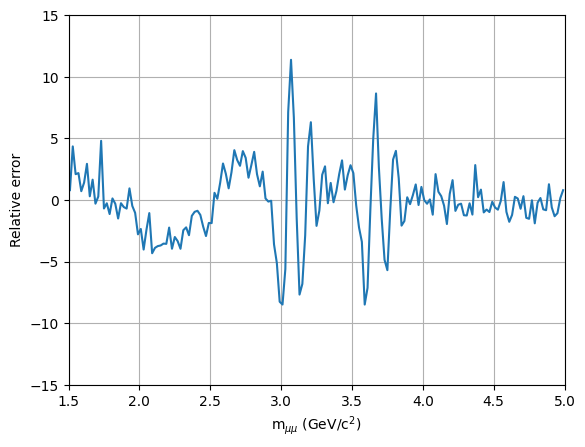

In [24]:
err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_MC["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [25]:
x_data = np.array(X)
y_data = np.array(vMass_LS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

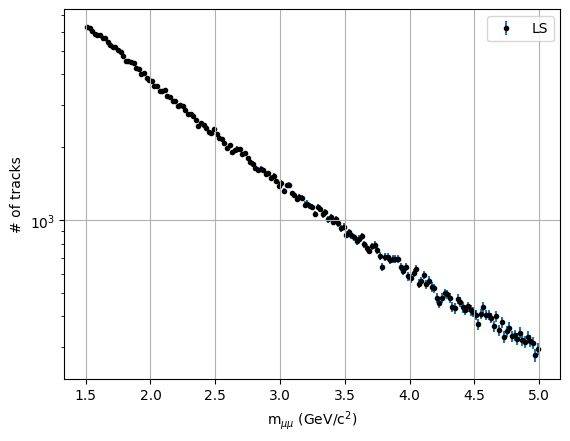

In [26]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [27]:
p0_bckg = np.array([1,1,1,1,1])

In [28]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_bckg, pcov_bckg, nfev_bckg, fvec_bckg, fjac_bckg = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_bckg, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_bckg))
print("pcov: \n", pcov_bckg)
print("residual: \n", nfev_bckg)

popt: 
 [8.779761187930946, 7.726117699409414, 6.855013696668161, 6.564378501964096, 5.688376837270858]
pcov: 
 [[ 2.65408205e-05 -5.12835624e-06  6.36833572e-06  2.01890159e-06
   1.27130118e-05]
 [-5.12835624e-06  8.36233078e-06  2.53180221e-06 -5.31123677e-07
   4.47894877e-06]
 [ 6.36833572e-06  2.53180221e-06  1.97436918e-05  1.57134086e-05
  -7.91367484e-07]
 [ 2.01890159e-06 -5.31123677e-07  1.57134086e-05  2.54806501e-05
  -3.71343680e-05]
 [ 1.27130118e-05  4.47894877e-06 -7.91367484e-07 -3.71343680e-05
   3.98663700e-04]]
residual: 
 {'nfev': 15, 'fvec': array([ 2.21971501e+00,  8.83380787e-01,  1.47182554e+00,  1.71401210e+00,
        1.04913638e+00, -9.22688103e-01, -6.56979334e-01, -1.93630687e+00,
       -6.44424370e-01, -5.01919120e-01, -2.60824398e-01, -2.30389784e+00,
       -1.54859781e+00, -1.72132129e+00, -3.27654508e-01,  8.64821841e-01,
       -1.81605849e-01, -9.77372737e-01, -1.77587448e+00, -2.77960399e-01,
       -9.04381842e-01,  4.87667921e-01, -1.13754185e+

fit error : 0.02188129779025445


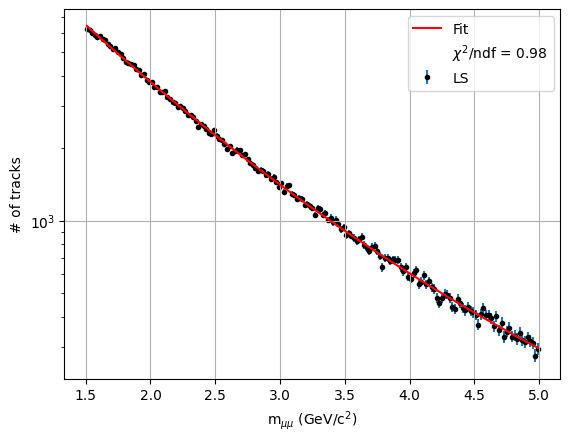

In [29]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_bckg(x_fit, *popt_bckg)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_bckg)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_bckg(x_data, *popt_bckg)) / y_error) ** 2)
ndf = len(x_data) + len(popt_bckg) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

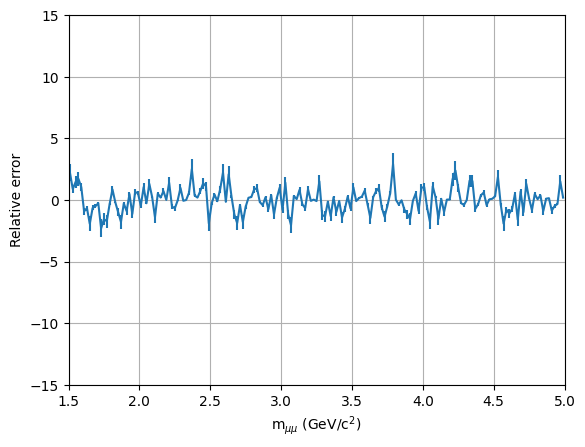

In [30]:
err = np.sqrt(nfev_bckg["fvec"]**2/(nfev_bckg["nfev"]-len(popt_bckg)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_bckg["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [31]:
x_data = np.array(X)
y_data = np.array(vMass_OS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

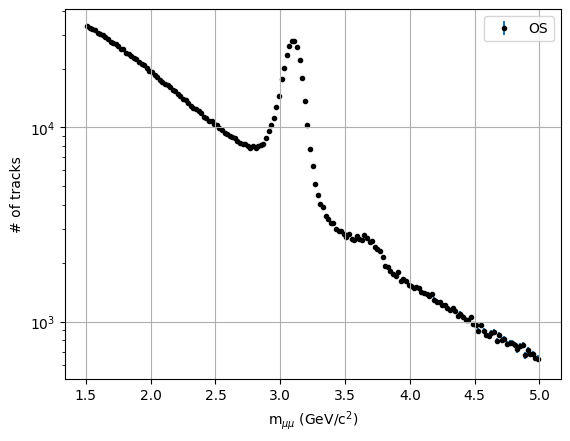

In [32]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [33]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1 = popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

y1 = popt_bckg[0]
y2 = popt_bckg[1]
y3 = popt_bckg[2]
y4 = popt_bckg[3]
y5 = popt_bckg[4]

p0 = np.array([N1, mu1, sig1, N2, mu2, sig2,  y1, y2, y3, y4, y5])

In [34]:
varbg = np.ones(np.shape(p0[6:]))*1# bg parameters variation factor around p0
varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0[:3],varpks), *mklb(p0[3:6],varpks), *mklb(p0[6:],varbg)])
ub = np.array([*mkub(p0[:3],varpks), *mkub(p0[3:6],varpks), *mkub(p0[6:],varbg)])
bounds = (lb,ub)

In [35]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, method = 'trf', full_output = True)
popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt))
print("pcov: \n", pcov)
print("residual: \n", nfev)

popt: 
 [24368.267468014114, 3.0974541325685636, 0.06853829075837777, 503.4200993173445, 3.6826058014315244, 0.0706313729057197, 10.4294961318537, 9.206559152115847, 7.94778634965109, 7.55753213812071, 6.445067413035913]
pcov: 
 [[ 2.50279010e+04  1.16764205e-02 -4.31928928e-02  1.08861536e+02
  -2.74745711e-02  5.24117883e-02 -2.53966223e-02 -1.73150888e-02
  -8.96004226e-02 -5.78502727e-02 -3.81115870e-02]
 [ 1.16764205e-02  2.13886005e-07 -7.82112708e-08 -5.38368815e-04
   1.69009693e-07 -3.05924548e-07  6.44647944e-08  3.05915971e-07
   6.17143203e-07  3.08493711e-07  4.93421923e-07]
 [-4.31928928e-02 -7.82112708e-08  2.46394386e-07  2.58807698e-03
  -3.55341569e-07  7.37704081e-07 -3.41584489e-07 -7.54606347e-07
  -2.02274050e-06 -1.25524990e-06 -9.10704114e-07]
 [ 1.08861536e+02 -5.38368815e-04  2.58807698e-03  2.74822954e+03
   3.85248346e-02 -2.32968207e-01 -1.76503803e-02 -1.82220460e-02
  -1.00775263e-01 -1.02338392e-01  8.06830554e-02]
 [-2.74745711e-02  1.69009693e-07 -3.55

fit error : 166.6617281767872


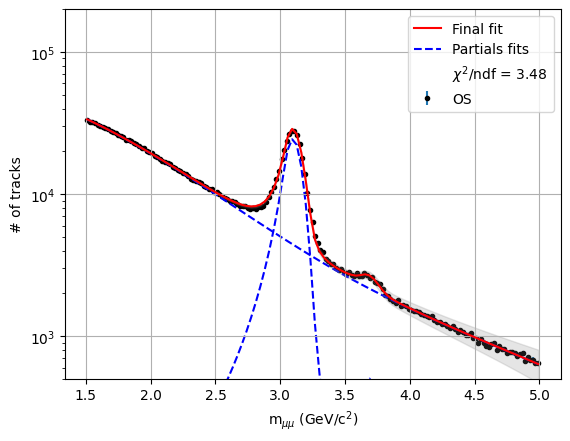

In [42]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func(x_fit, *popt)
plt.plot(x_fit, y_fit, '-r', zorder = 2, label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt[3:6]), '--b', zorder = 1)
plt.plot(x_fit, fixedFunc_bckg(x_fit, *popt[6:]), '--b', zorder = 1)

sigmas = np.absolute(np.diag(pcov))
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func(x_data, *popt)) / y_error) ** 2)
ndf = len(x_data) + len(popt) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.legend()
plt.yscale('log')
plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.ylim(500, 200000)
plt.grid(True)

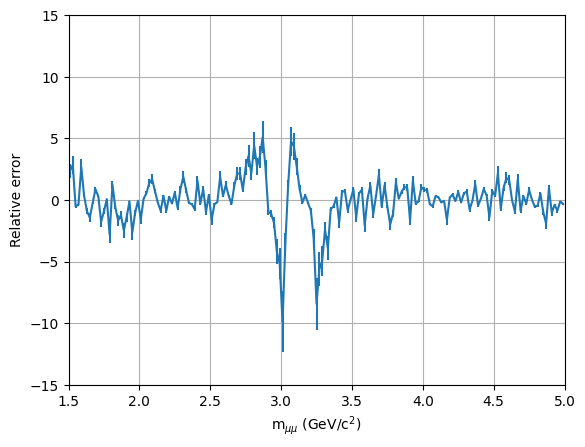

In [43]:
err = np.sqrt(nfev["fvec"]**2/(nfev["nfev"]-len(popt)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [44]:
def dCB2(pcov, x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )
    
    def dCB2dx(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: AL*N*nL/(sig*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: -N*(-2*mu + 2*x)*np.exp(-(-mu + x)**2/(2*sig**2))/(2*sig**2), 
                             lambda x: -AR*N*nR/(sig*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])
    
    def dCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: AL/(BL - (-mu + x)/sig)**nL, 
                             lambda x: np.exp(-(-mu + x)**2/(2*sig**2)), 
                             lambda x: AR/(BR + (-mu + x)/sig)**nR])

    def dCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: -AL*N*nL/(sig*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: -N*(2*mu - 2*x)*np.exp(-(-mu + x)**2/(2*sig**2))/(2*sig**2), 
                             lambda x: AR*N*nR/(sig*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])

    def dCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: -AL*N*nL*(-mu + x)/(sig**2*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: N*(-mu + x)**2*np.exp(-(-mu + x)**2/(2*sig**2))/sig**3, 
                             lambda x: AR*N*nR*(-mu + x)/(sig**2*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])
    
    def IdCB2dx(x, *args):
        return quad(dCB2dx, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dN(x, *args):
        return quad(dCB2dN, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dmu(x, *args):
        return quad(dCB2dmu, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dsig(x, *args):
        return quad(dCB2dsig, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    return np.sqrt(IdCB2dx(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * (((stop - start)/bins)/2)**2 \
                   + IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[0, 0] \
                   + IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[1, 1] \
                   + IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[2, 2] \
                   + 2 * IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[0, 1])) \
                   + 2 * IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[1, 2])) \
                   + 2 * IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[2, 1])))

N_JPsi = quad(fixedFunc_JPsi, start, stop, args = (*popt[:3], ))[0] / ((stop - start)/bins)
err_JPsi = dCB2(pcov[:3, :3], x_data, *popt[:3], *popt_JPsi[3:])
print(r"N_JPsi = ", N_JPsi, " +/- ", err_JPsi, "(stat.)")

N_JPsi =  254117.01851183575  +/-  2927.0818118851475 (stat.)
